In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import SelectFromModel 

In [3]:
df = pd.read_csv('/content/drive/MyDrive/B_A_Data/cutomer_filtered.csv', index_col= 0)

In [4]:
df.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_mobile
0,2,0.0,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0
1,1,0.0,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0
2,2,0.0,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,0.0,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0
4,2,0.0,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


In [5]:
df.drop(['route', 'booking_origin'],axis = 1,  inplace = True)

In [6]:
df.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_mobile
0,2,0.0,262,19,7,6,1,0,0,5.52,0,0
1,1,0.0,112,20,3,6,0,0,0,5.52,0,0
2,2,0.0,243,22,17,3,1,1,0,5.52,0,0
3,1,0.0,96,31,4,6,0,0,1,5.52,0,0
4,2,0.0,68,22,15,3,1,0,1,5.52,0,0


In [7]:
from sklearn.preprocessing import MinMaxScaler
minMax = MinMaxScaler()

In [8]:
features_scale = [feature for feature in df.columns if feature not in ['booking_complete']]

In [9]:
minMax.fit(df[features_scale])
minMax.transform(df[features_scale])

array([[0.125     , 0.        , 0.44863014, ..., 0.        , 0.17598344,
        0.        ],
       [0.        , 0.        , 0.19178082, ..., 0.        , 0.17598344,
        0.        ],
       [0.125     , 0.        , 0.41609589, ..., 0.        , 0.17598344,
        0.        ],
       ...,
       [0.        , 0.        , 0.04109589, ..., 1.        , 0.19668737,
        0.        ],
       [0.        , 0.        , 0.02568493, ..., 1.        , 0.19668737,
        0.        ],
       [0.        , 0.        , 0.03253425, ..., 0.        , 0.19668737,
        0.        ]])

In [10]:
df_ = pd.concat( [df['booking_complete'].reset_index(drop = True), 
                pd.DataFrame(minMax.transform(df[features_scale]), columns = features_scale)], 
                axis =1
                )

In [76]:
X = df_.iloc[:,1:]
y = df_['booking_complete']

In [77]:
df_.drop('booking_complete', inplace = True, axis = 1)
df_.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_mobile
0,0.125,0.0,0.448630,0.024422,0.304348,0.833333,1.0,0.0,0.0,0.175983,0.0
1,0.000,0.0,0.191781,0.025707,0.130435,0.833333,0.0,0.0,0.0,0.175983,0.0
2,0.125,0.0,0.416096,0.028278,0.739130,0.333333,1.0,1.0,0.0,0.175983,0.0
3,0.000,0.0,0.164384,0.039846,0.173913,0.833333,0.0,0.0,1.0,0.175983,0.0
4,0.125,0.0,0.116438,0.028278,0.652174,0.333333,1.0,0.0,1.0,0.175983,0.0


In [13]:
X

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_mobile
0,0.125,0.0,0.448630,0.024422,0.304348,0.833333,1.0,0.0,0.0,0.175983,0.0
1,0.000,0.0,0.191781,0.025707,0.130435,0.833333,0.0,0.0,0.0,0.175983,0.0
2,0.125,0.0,0.416096,0.028278,0.739130,0.333333,1.0,1.0,0.0,0.175983,0.0
3,0.000,0.0,0.164384,0.039846,0.173913,0.833333,0.0,0.0,1.0,0.175983,0.0
4,0.125,0.0,0.116438,0.028278,0.652174,0.333333,1.0,0.0,1.0,0.175983,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49987,0.125,0.0,0.046233,0.007712,0.391304,0.833333,1.0,0.0,1.0,0.196687,0.0
49988,0.000,0.0,0.190068,0.007712,0.173913,1.000000,0.0,0.0,0.0,0.196687,0.0
49989,0.000,0.0,0.041096,0.007712,0.956522,0.833333,0.0,0.0,1.0,0.196687,0.0
49990,0.000,0.0,0.025685,0.007712,0.478261,0.000000,1.0,0.0,1.0,0.196687,0.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42 )

## feature selection

In [15]:
sel = SelectFromModel(Lasso(alpha = 0.004, random_state=42))
sel.fit(X_train, y_train)
sel.get_support()

array([False, False, False, False, False, False,  True,  True, False,
        True,  True])

In [16]:
imp_feat = X_train.columns[sel.get_support()]

In [17]:
imp_feat

Index(['wants_extra_baggage', 'wants_preferred_seat', 'flight_duration',
       'sales_channel_mobile'],
      dtype='object')

## RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
ran_cl = RandomForestClassifier(max_depth = 1000000, min_samples_split= 5)

In [20]:
ran_cl.fit(X_train, y_train)

RandomForestClassifier(max_depth=1000000, min_samples_split=5)

In [21]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, ran_cl.predict(X_train))

In [22]:
mse_train

0.060085514965118894

In [23]:
mse_tst = mean_squared_error(y_test, ran_cl.predict(X_test))

In [24]:
mse_tst

0.1499149914991499

Here the mse for both train and test is similar hence theres no overfitting

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
y_pred =  ran_cl.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.8500850085008501

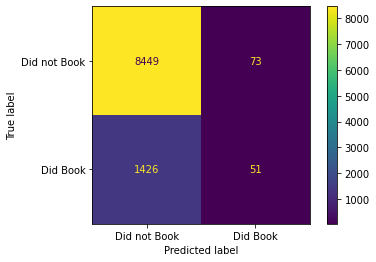

In [122]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=['Did not Book', 'Did Book']).plot()

here the 1475 did complete the Booking still the model predicted that they didn't.  

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.06371018113678951

In [30]:
y_train.value_counts()

0    33994
1     5999
Name: booking_complete, dtype: int64

In [31]:
y_test.value_counts()

0    8522
1    1477
Name: booking_complete, dtype: int64

Clearly the model contains imbalanced data which means that the data for nobooking are more a compared to successful booking.

Hence the f1_score value is low. as there are high FAlse Negative.


https://towardsdatascience.com/essential-things-you-need-to-know-about-f1-score-dbd973bf1a3

In [32]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.034529451591062965

In [33]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred,)

0.4112903225806452

Text(0.5, 0, 'Random Forest Feature Importance')

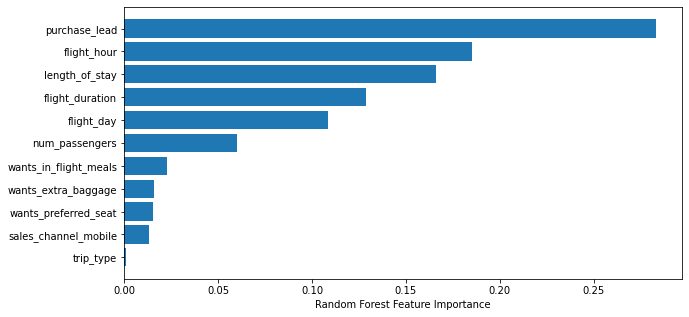

In [81]:
plt.figure(figsize=(10,5))
sorted_idx = ran_cl.feature_importances_.argsort()
plt.barh(df_.iloc[:,:].columns[sorted_idx], ran_cl.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

So now need to balance the data

## Balanced Data

In [35]:
df_.head()

,booking_complete,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_mobile
0,0,0.125,0.0,0.448630,0.024422,0.304348,0.833333,1.0,0.0,0.0,0.175983,0.0
1,0,0.000,0.0,0.191781,0.025707,0.130435,0.833333,0.0,0.0,0.0,0.175983,0.0
2,0,0.125,0.0,0.416096,0.028278,0.739130,0.333333,1.0,1.0,0.0,0.175983,0.0
3,0,0.000,0.0,0.164384,0.039846,0.173913,0.833333,0.0,0.0,1.0,0.175983,0.0
4,0,0.125,0.0,0.116438,0.028278,0.652174,0.333333,1.0,0.0,1.0,0.175983,0.0


In [36]:
df_0 = df_[df_.booking_complete ==0].sample(n=8000)

In [37]:
df_0

,booking_complete,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_mobile
3599,0,0.000,0.0,0.041096,0.021851,0.043478,1.000000,0.0,0.0,0.0,0.861284,0.0
11634,0,0.000,0.0,0.594178,0.046272,0.391304,1.000000,1.0,0.0,0.0,0.196687,0.0
36369,0,0.000,0.0,0.282534,0.006427,0.130435,0.500000,1.0,1.0,0.0,0.010352,1.0
15975,0,0.125,0.0,0.316781,0.032134,0.434783,0.833333,1.0,0.0,1.0,0.861284,0.0
13809,0,0.000,0.0,0.184932,0.023136,0.043478,0.833333,1.0,0.0,1.0,0.861284,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37171,0,0.000,0.0,0.020548,0.006427,0.652174,0.166667,0.0,0.0,0.0,0.196687,0.0
29544,0,0.375,0.0,0.614726,0.005141,0.608696,0.166667,1.0,0.0,1.0,0.403727,0.0
48437,0,0.000,0.0,0.037671,0.007712,0.086957,1.000000,0.0,0.0,0.0,0.482402,1.0
20828,0,0.125,0.0,0.075342,0.048843,0.782609,1.000000,1.0,1.0,1.0,0.861284,1.0


In [38]:
scaled_df_new = pd.concat([df_[df_.booking_complete==1], df_0], ignore_index=True)

In [39]:
scaled_df_new

,booking_complete,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_mobile
0,1,0.000,0.0,0.025685,0.039846,0.739130,0.000000,0.0,0.0,0.0,0.861284,0.0
1,1,0.000,0.0,0.267123,0.024422,0.608696,0.000000,1.0,0.0,0.0,0.861284,0.0
2,1,0.000,0.0,0.309932,0.111825,0.086957,0.166667,1.0,0.0,1.0,0.861284,0.0
3,1,0.000,0.0,0.217466,0.021851,0.695652,0.166667,1.0,0.0,1.0,0.861284,1.0
4,1,0.000,0.0,0.071918,0.021851,0.608696,0.166667,0.0,0.0,0.0,0.861284,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15471,0,0.000,0.0,0.020548,0.006427,0.652174,0.166667,0.0,0.0,0.0,0.196687,0.0
15472,0,0.375,0.0,0.614726,0.005141,0.608696,0.166667,1.0,0.0,1.0,0.403727,0.0
15473,0,0.000,0.0,0.037671,0.007712,0.086957,1.000000,0.0,0.0,0.0,0.482402,1.0
15474,0,0.125,0.0,0.075342,0.048843,0.782609,1.000000,1.0,1.0,1.0,0.861284,1.0


In [40]:
scaled_df_new.booking_complete.value_counts()

0    8000
1    7476
Name: booking_complete, dtype: int64

In [41]:
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [42]:
scaled_df_new.shape

(15476, 12)

In [43]:
XB_train, XB_test, yB_train, yB_test = train_test_split(scaled_df_new.iloc[:,1:], scaled_df_new['booking_complete'], 
                                                        test_size = 0.2, random_state = 0)

In [44]:
cl_ran = RandomForestClassifier(max_depth= 100000, min_samples_split=5)

In [45]:
cl_ran.fit(XB_train, yB_train)

RandomForestClassifier(max_depth=100000, min_samples_split=5)

In [46]:
bal_pred = cl_ran.predict(XB_test)

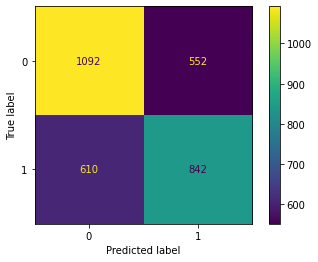

In [104]:
ConfusionMatrixDisplay(confusion_matrix(yB_test, bal_pred )).plot()

In [103]:
accuracy_score(yB_test, bal_pred)

0.6246770025839793

In [49]:
cl_ran.feature_importances_

array([0.05808149, 0.00086038, 0.24577394, 0.18172823, 0.17709735,
       0.10551349, 0.02252964, 0.02139393, 0.02469898, 0.14644517,
       0.0158774 ])

Text(0.5, 0, 'Random Forest Feature Importance')

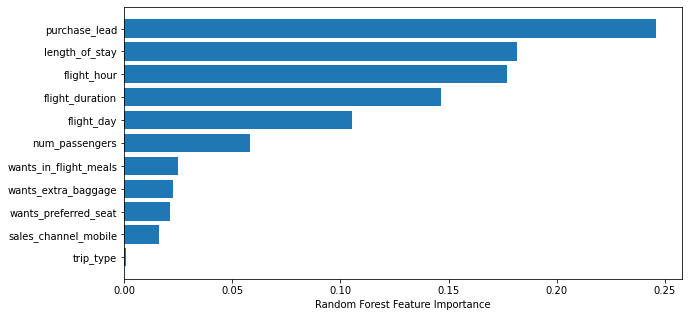

In [83]:
plt.figure(figsize=(10,5))
sorted_idx = cl_ran.feature_importances_.argsort()
plt.barh(df_.iloc[:,:].columns[sorted_idx], cl_ran.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


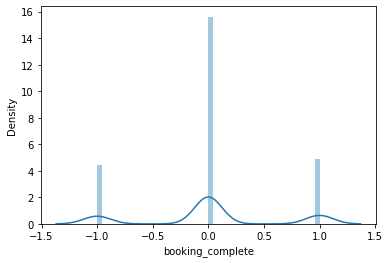

In [51]:
sns.distplot(yB_test - bal_pred)

In [85]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10000, 100000, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [86]:
print(n_estimators)
print(max_features)
print(max_depth)
print(min_samples_split)
print(min_samples_leaf)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
['auto', 'sqrt']
[10000, 28000, 46000, 64000, 82000, 100000]
[2, 5, 10, 15, 100]
[1, 2, 5, 10]


In [87]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10000, 28000, 46000, 64000, 82000, 100000], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [88]:
from sklearn.model_selection import RandomizedSearchCV
rfCl = RandomForestClassifier()
r_cv = RandomizedSearchCV( estimator = rfCl, param_distributions= random_grid, 
                          scoring = 'neg_mean_squared_error',
                          n_iter = 10, cv = 5, 
                          verbose = 2, random_state = 42, 
                          n_jobs = 1 
                        )

In [89]:
r_cv.fit(XB_train, yB_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=28000, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.8s
[CV] END max_depth=28000, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.6s
[CV] END max_depth=28000, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.6s
[CV] END max_depth=28000, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.6s
[CV] END max_depth=28000, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.6s
[CV] END max_depth=46000, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.4s
[CV] END max_depth=46000, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.6s
[CV] END max_depth=46000, max_features=sqrt, min_samples_leaf=2, min_sampl

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [10000, 28000, 46000,
                                                      64000, 82000, 100000],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
r_cv.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 64000}

In [91]:
best_rclf = RandomForestClassifier(n_estimators= 700, min_samples_split=5, min_samples_leaf=10
                                   , max_features='auto', max_depth = 64000)
best_rclf.fit(XB_train,yB_train)
best_rclf_pred = best_rclf.predict(XB_test)

In [92]:
accuracy_score(yB_test, best_rclf_pred)

0.6350129198966409

In [67]:
best_rclf = RandomForestClassifier(n_estimators= 900, min_samples_split=5, min_samples_leaf=5, max_features='sqrt', max_depth = 10)
best_rclf.fit(XB_train,yB_train)
best_rclf_pred = best_rclf.predict(XB_test)

In [68]:
accuracy_score(yB_test, best_rclf_pred)

0.6366279069767442

In [94]:
from sklearn.metrics import recall_score, f1_score, precision_score

In [96]:
print('recall: ', recall_score(yB_test, best_rclf_pred))
print('precision', precision_score(yB_test, best_rclf_pred))
print('f1', f1_score(yB_test, best_rclf_pred))

recall:  0.5950413223140496
precision 0.6145092460881935
f1 0.6046186144156752


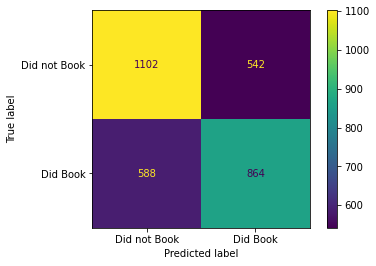

In [106]:
ConfusionMatrixDisplay(confusion_matrix(yB_test, best_rclf_pred ), display_labels = ['Did not Book', 'Did Book']).plot()

In [69]:
train_pred_random = r_cv.predict(XB_test)

In [70]:
accuracy_score(yB_test, train_pred_random)

0.6363049095607235

Text(0.5, 0, 'Random Forest Feature Importance')

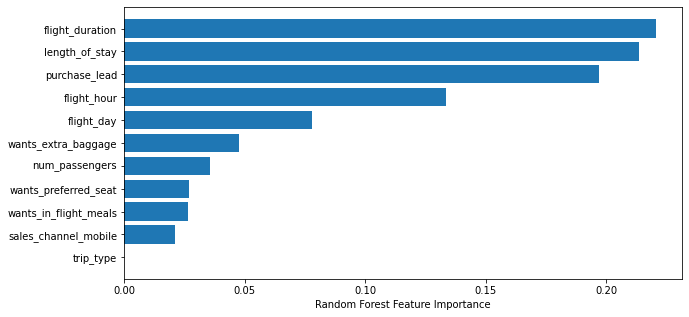

In [93]:
plt.figure(figsize=(10,5))
sorted_idx = best_rclf.feature_importances_.argsort()
plt.barh(df_.iloc[:,:].columns[sorted_idx], best_rclf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [107]:
from sklearn.svm import SVC 

In [108]:
svc = SVC()

In [109]:
svc.fit(XB_train, yB_train)

SVC()

In [111]:
pred = svc.predict(XB_test)

In [112]:
accuracy_score(yB_test, pred)

0.599483204134367

In [115]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(max_depth = 10000, min_samples_leaf=5, min_samples_split=5)

In [116]:
dtr.fit(XB_train, yB_train)
pred = dtr.predict(XB_test)
accuracy_score(yB_test, pred)

0.583656330749354

In [117]:
dtr.feature_importances_

array([0.04162717, 0.        , 0.29856368, 0.18301778, 0.15029774,
       0.085592  , 0.0343379 , 0.01854426, 0.02578203, 0.14687512,
       0.01536232])

Text(0.5, 0, 'Random Forest Feature Importance')

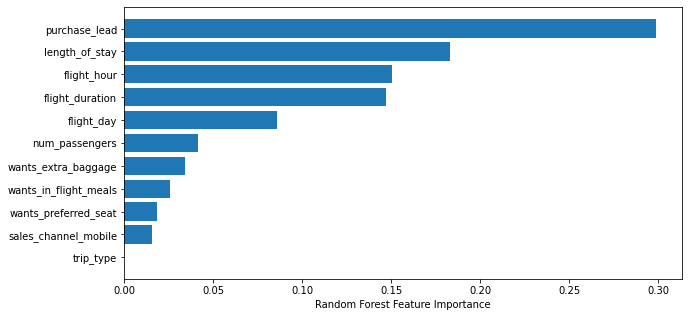

In [119]:
plt.figure(figsize=(10,5))
sorted_idx = dtr.feature_importances_.argsort()
plt.barh(df_.iloc[:,:].columns[sorted_idx], dtr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [120]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(XB_train, yB_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [121]:
clf_pred = clf.predict(XB_test)
accuracy_score(yB_test, clf_pred)

0.6227390180878553